In [32]:
#Dependencies
import pandas as pd
import tweepy
from datetime import datetime as dt
from datetime import date
from datetime import timedelta
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from time import strftime
import math


from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from apikeys import consumer_key, consumer_secret, access_token, access_token_secret

from scipy.stats import linregress



import requests
import json
from apikeys import av_key
import pandas as pd
import os
import csv
import sys
import seaborn as sns

In [3]:
main_data=pd.read_csv('Resource_CSVs/Main_data.csv')
main_data.head()

,index,Date,Likes,Retweets,Compound,Negative,Neutral,Positive,S&P500 Open,S&P500 Close,...,NAS Close,S&P500 Same-Day Change,S&P500 1-Day Change,S&P500 2-Day Change,DJ Same-Day Change,DJ 1-Day Change,DJ 2-Day Change,NAS Same-Day Change,NAS 1-Day Change,NAS 2-Day Change
0,6,2017-06-06,184006,42019,-0.6460,0.276,0.6895,0.0345,2431.9199,2429.3301,...,6275.0601,-0.19,0.19,0.69,-0.63,0.65,-0.12,2.81,-0.97,2.80
1,7,2017-06-09,87635,20598,0.8588,0.000,0.6560,0.3440,2436.3899,2431.7700,...,6207.9199,1.30,-1.29,-1.31,0.70,-0.67,-0.58,2.94,-2.90,-2.46
2,13,2017-06-16,106922,23348,0.8556,0.000,0.6910,0.3090,2431.2400,2433.1499,...,6151.7598,0.63,-0.61,0.01,1.21,-1.19,-0.40,-0.49,0.30,0.84
3,18,2017-06-21,111275,26682,0.7088,0.000,0.7430,0.2570,2439.3101,2435.6101,...,6233.9502,0.96,-0.95,-1.33,0.34,-0.30,0.16,5.49,-3.28,-5.08
4,20,2017-06-23,51865,9635,0.8176,0.000,0.6670,0.3330,2434.6499,2438.3000,...,6265.2500,-0.19,0.19,2.89,-0.35,0.38,2.74,0.30,0.49,7.13


In [28]:
likes = main_data["Likes"]
retweets = main_data["Retweets"]
compound = main_data["Compound"]
SP500_SameDay = np.absolute(main_data["S&P500 Same-Day Change"])
SP500_1Day = main_data["S&P500 1-Day Change"]
SP500_2Day = main_data["S&P500 2-Day Change"]    
DJ_SameDay = main_data["DJ Same-Day Change"]
DJ_1Day = main_data["DJ 1-Day Change"]
DJ_2Day = main_data["DJ 2-Day Change"]
NAS_SameDay= main_data["NAS Same-Day Change"]
NAS_1Day = main_data["NAS 1-Day Change"]
NAS_2Day = main_data['NAS 2-Day Change']

<function matplotlib.pyplot.show>

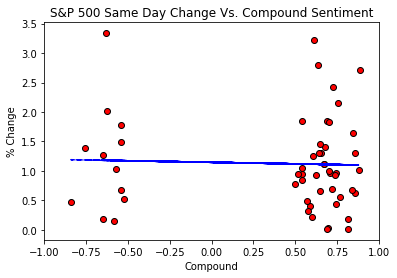

In [36]:
plt.scatter(compound, SP500_SameDay, marker="o", facecolors="red", edgecolors="black")
# plt.ylim(-3.25, 3.5)
plt.xlim(-1, 1)
plt.title("S&P 500 Same Day Change Vs. Compound Sentiment")
plt.xlabel("Compound")
plt.ylabel("% Change")
slope, intercept, _, _, _ = linregress(compound, SP500_SameDay)
fit = slope * compound + intercept
plt.plot(compound, fit, 'b--')
plt.show

<function matplotlib.pyplot.show>

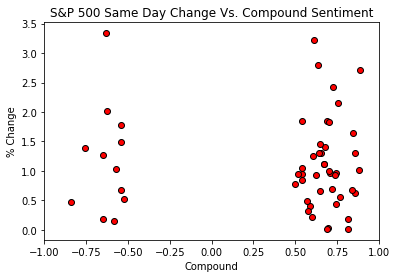

In [38]:
plt.scatter(compound, SP500_SameDay, marker="o", facecolors="red", edgecolors="black")
# plt.ylim(-3.25, 3.5)
plt.xlim(-1, 1)
plt.title("S&P 500 Same Day Change Vs. Compound Sentiment")
plt.xlabel("Compound")
plt.ylabel("% Change")
plt.show

<function matplotlib.pyplot.show>

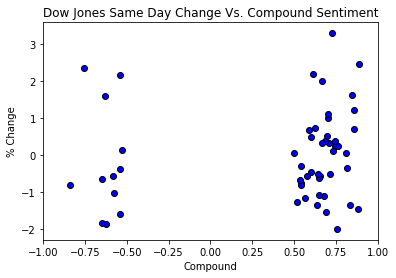

In [17]:
plt.scatter(compound, DJ_SameDay, marker="o", facecolors="blue", edgecolors="black")
# plt.ylim(-3.25, 3.5)
plt.xlim(-1, 1)
plt.title("Dow Jones Same Day Change Vs. Compound Sentiment")
plt.xlabel("Compound")
plt.ylabel("% Change")
plt.show

<function matplotlib.pyplot.show>

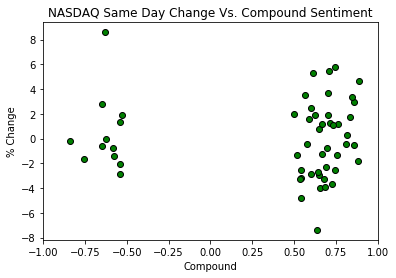

In [18]:
plt.scatter(compound, NAS_SameDay, marker="o", facecolors="green", edgecolors="black")
# plt.ylim(-3.25, 3.5)
plt.xlim(-1, 1)
plt.title("NASDAQ Same Day Change Vs. Compound Sentiment")
plt.xlabel("Compound")
plt.ylabel("% Change")
plt.show

<function matplotlib.pyplot.show>

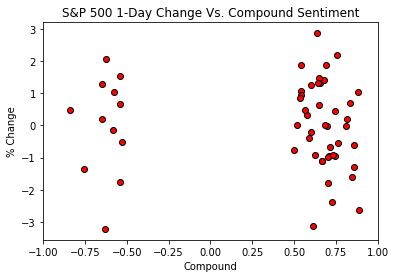

In [20]:
plt.scatter(compound, SP500_1Day, marker="o", facecolors="red", edgecolors="black")
# plt.ylim(-3.25, 3.5)
plt.xlim(-1, 1)
plt.title("S&P 500 1-Day Change Vs. Compound Sentiment")
plt.xlabel("Compound")
plt.ylabel("% Change")
plt.show

<function matplotlib.pyplot.show>

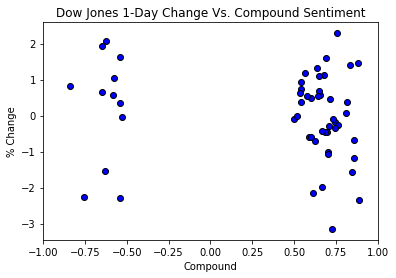

In [21]:
plt.scatter(compound, DJ_1Day, marker="o", facecolors="blue", edgecolors="black")
# plt.ylim(-3.25, 3.5)
plt.xlim(-1, 1)
plt.title("Dow Jones 1-Day Change Vs. Compound Sentiment")
plt.xlabel("Compound")
plt.ylabel("% Change")
plt.show

<function matplotlib.pyplot.show>

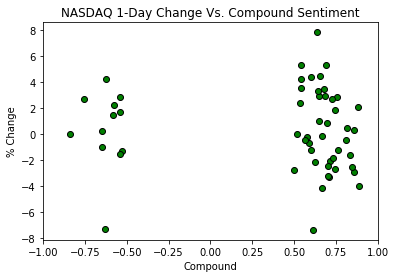

In [23]:
plt.scatter(compound, NAS_1Day, marker="o", facecolors="green", edgecolors="black")
# plt.ylim(-3.25, 3.5)
plt.xlim(-1, 1)
plt.title("NASDAQ 1-Day Change Vs. Compound Sentiment")
plt.xlabel("Compound")
plt.ylabel("% Change")
plt.show

<function matplotlib.pyplot.show>

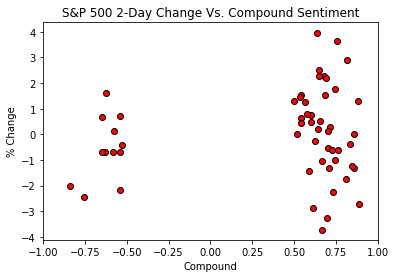

In [24]:
plt.scatter(compound, SP500_2Day, marker="o", facecolors="red", edgecolors="black")
# plt.ylim(-3.25, 3.5)
plt.xlim(-1, 1)
plt.title("S&P 500 2-Day Change Vs. Compound Sentiment")
plt.xlabel("Compound")
plt.ylabel("% Change")
plt.show

<function matplotlib.pyplot.show>

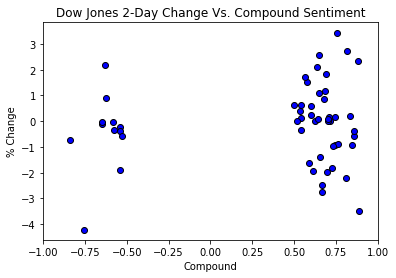

In [25]:
plt.scatter(compound, DJ_2Day, marker="o", facecolors="blue", edgecolors="black")
# plt.ylim(-3.25, 3.5)
plt.xlim(-1, 1)
plt.title("Dow Jones 2-Day Change Vs. Compound Sentiment")
plt.xlabel("Compound")
plt.ylabel("% Change")
plt.show

<function matplotlib.pyplot.show>

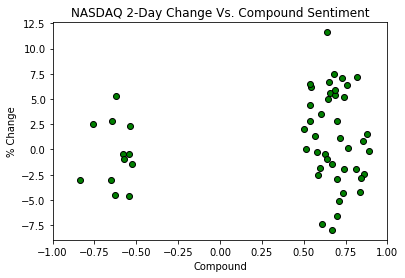

In [26]:
plt.scatter(compound, NAS_2Day, marker="o", facecolors="green", edgecolors="black")
# plt.ylim(-3.25, 3.5)
plt.xlim(-1, 1)
plt.title("NASDAQ 2-Day Change Vs. Compound Sentiment")
plt.xlabel("Compound")
plt.ylabel("% Change")
plt.show